# Lecture 30 Boosting ( Regression )

Boosting - For every information my prediction is keep on getting closer to the acutal . So he is asking me predict how much i got initially he did not give any information . So i give all together different number then he started giving 1 by 1 different information . So everytime he give information my analysis my pridictin will get boosted . So  it is getting closer to the acutal so the this is how boosting work behind the scene . Feature are going to help you to predict as close as to the acutal so all feature and label connected with each other at the end i am going to make one decision . Then i use to make out of that i will go with a majority  or take a average .But here one information will be pass to another , another pass to next one we are going to consider  one by one all those information then we are going to predict a label . So this is the idea behind Boosting.





We will start with one feature then we will combine , combine ,combine and finally we are going to keep tuning . Our salary number is keep on tuning depending as an when a new information is getting in . so that is how at high level boosting works .




# Boosting - 


Boosting is an ensemble approaches (Meaning it involves several trees) that start from a weaker decision and keeps on building the models such that the final prediction is the weighted sum of all the weaker decision makers . The weight are assigned based on the performance of an individual trees.




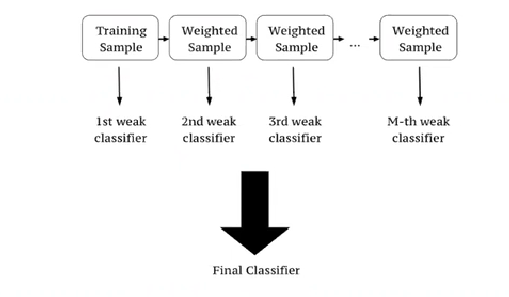



Ensemble parameters are calculated in stagewise way which means that while calculating the subsequent , weight , the learning from the previous tree is consider as well.

# Weak Classifier Why Tree ?



First what is weak classifier ? Weak classifier -Slightly better than random guessing.

Any algorithm could have been used as a base for boosting technique . But the reason for choosing trees are :


# Pros 

- Computational Scalability


- Handles Missing Values 


- Robust to outliers 


- Does not require Feature scaling


- Can deal with irrelevant inputs 


- Interpretable (if small) -> Understanding in less feature 


- Handles mixed predictors as well (quantitive and qualitative)

quantitive -> Continious Data


qualitative -> Categorical Data




# Cons


- Inability to extract to a linear combination of feature .


- High Variance leading to a small Computational Power .



And thats where boosting comes into the picture . In minimise the variance by taking into consideration the result form various trees.

# We are going to learn three algorithms .


Bagging - 1 - Bagging Classifier , Random Forest , Voting Classifier

Boosting - Ada Boost , Gradient Boosting , XGB




# Voting Classifier -,


So , it is simply nomthing but you are going to build  multiple models and each model will produce different different result . So  you are going in that direction it is a simple concept but no one can use and its comes under bagging only .



# 1st Algorithms in Boosting is :


# Ada Boost ( Adaptive Boosting ) :-

How individually this algorithm work overall concept we got to know How it is going to work . But individually there is a small difference . Overall Concept is same but small tweaks in each algorithm.


Example - For Understanding this algorithm we will use the following simple data set for heart patient prediction.




-> Again Boosting Technique are supervised machine learning technique and all the algorithm can be used for regression as well as classification most of these algorithm are used for regression this are popularly used for regression purpose .




Equally i dont say that they not used for the classification i would say 60 .%





1- There are total 8 rows in our dataset Hence we will initalize the sample weight (w)=1/n as 1/8 in the beginning . And at the beginning , all  the samples are equally important. 


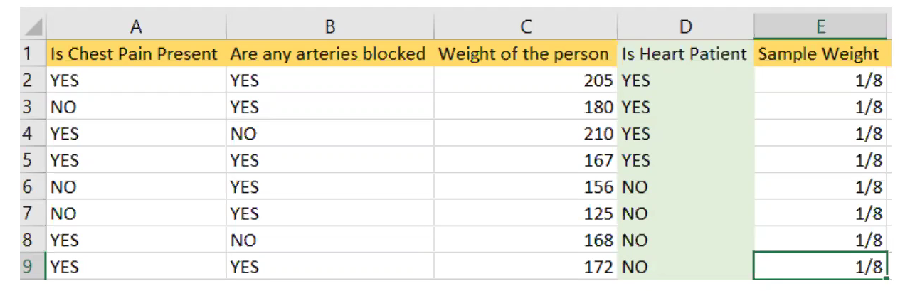



Chest pain i am going to build a small tree based on only one feature starting with a chest pain. How Chest pain is going to contribute this label How much is going to contribute So lets build a small tree based on only feature and that tree we call it as a STUMP.




2- We will consider the individual columns to create weak decision makers as shown below and then try to figure out what are the correct and incorrect predictions based on that columnsm.


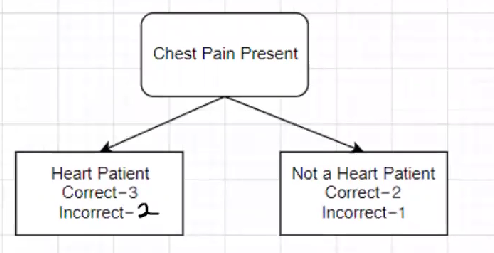

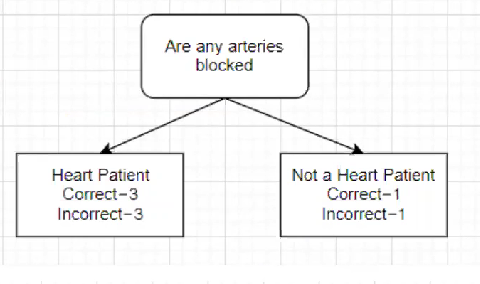

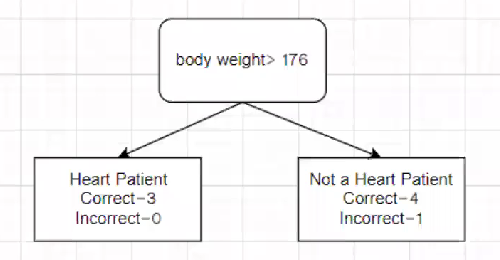





According is going to make a prediction So , Create the STUMP

So , Internally it is going to find the Gini impurity . For chest pain , arteries Block as well as for the weight . it will find the gini impurity we know how gini impurity work . Because Adaboost is going to use internally DecisionTrees say all this feature gives one by one . it is going to build  trees . with n_estimators . So Decision Tree uses entropy and Gini Criteria so here we  are going to use Gini and Find the Gini index for each and every stump.





- We'll now claculate the Gini index of the individual stumps using the formula .

G.I=Σ(weight of the decision)*(1-(p2+(1-p2)2))


GI For chest pain tree = 0.47

GI For Blocked arteries tre = 0.5

GI for Bodu weight trees = 0.2



And , We select the tree with the lowest gini index . This will be first decision maker for our model.


- No, we will calculate the contribution of this tree (Stump) to  our final decision using the formula 

contribution =1/2(log(1-total error)/total error)



As this Stump classfied  only one data incorrectly out of the 8 , Hence the total error i 1/8 putting this into the formula we get contribution =0.97

# Lets Look What We Did:

1- Stump

2-Find the lowest gini indexing for each and every stump.


3-  Then its find the contribution



- We will now calculate the new weight using the formluma 


- Increase the sample weight for incorrectly classified data points                                     New Weight =Old Weight ^ Contribution =1/8 e^-097=0.55


- Decrease the Sample weight for correctly classified data points 
   New Weight = Old weight ^-contribution = 1/8 e^-0.97 =0.55
   
   
- Populate the new weight as show below .


Formula ->(Old Weight e^ Contrubution ) - > Incorrectly Classified 


Formula -> (Old Wight e^ - Contrubution ) - > Correctly Classified.



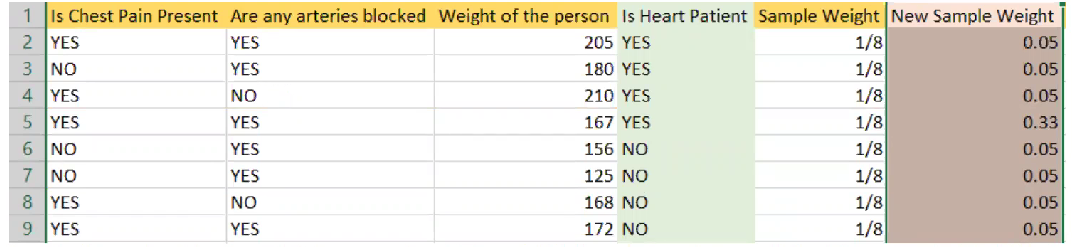








Normalize the Samples weight : If we add all the samples weight , we get 0.68 Hence . For normalization we divide all the sample weight by 0.68 and then create normalized sample Weight as Shown below.





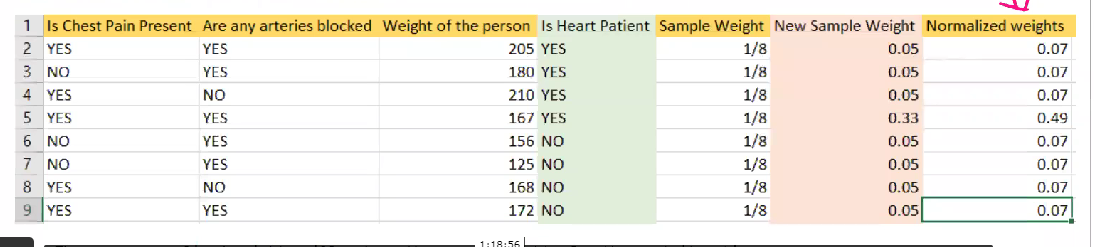




- These new normalized weight will acts as the sample weights for the next iteration .


- Then we create new trees which consider the dataset which was prepared using the sample wights.



- Suppose ,m trees(stumps) are classifying a person  as  a heart patient and n trees (stumps) are classifying a person as a healthy one . Then the contrubution of M and N trees are added separately and which ever has a higher value, the person is classified as that.



- for example, if the contribution of m trees is 1.2 and the contribution of n trees is 0.5 then the final result will go in the favour of m trees and the person will be classified as a heart patient.

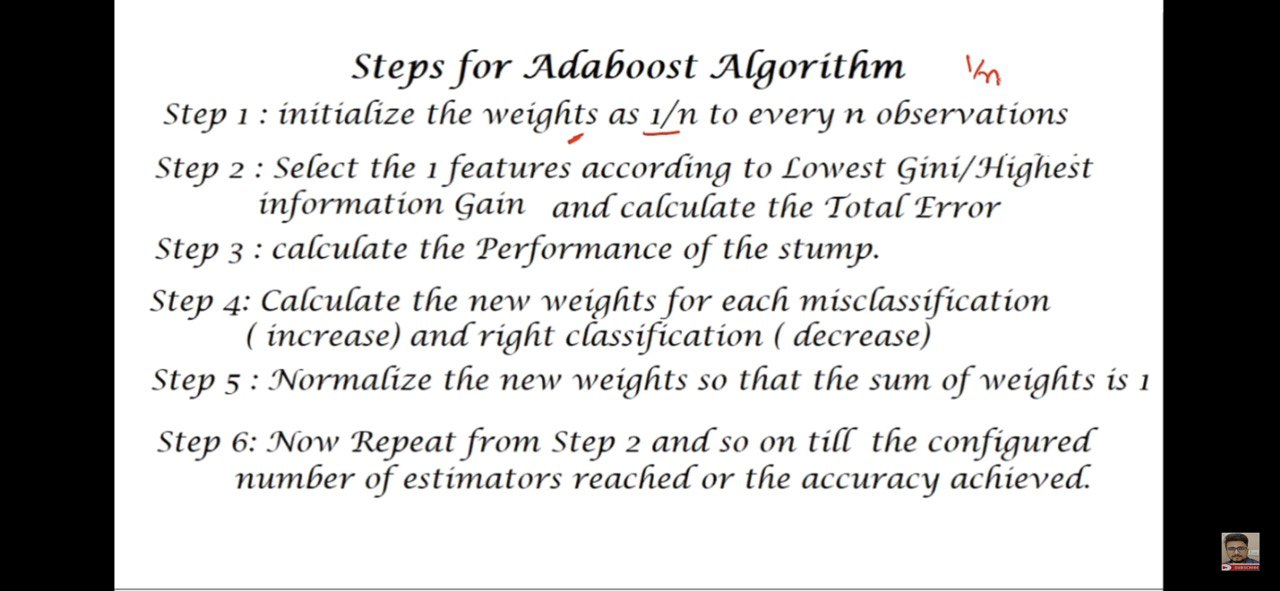

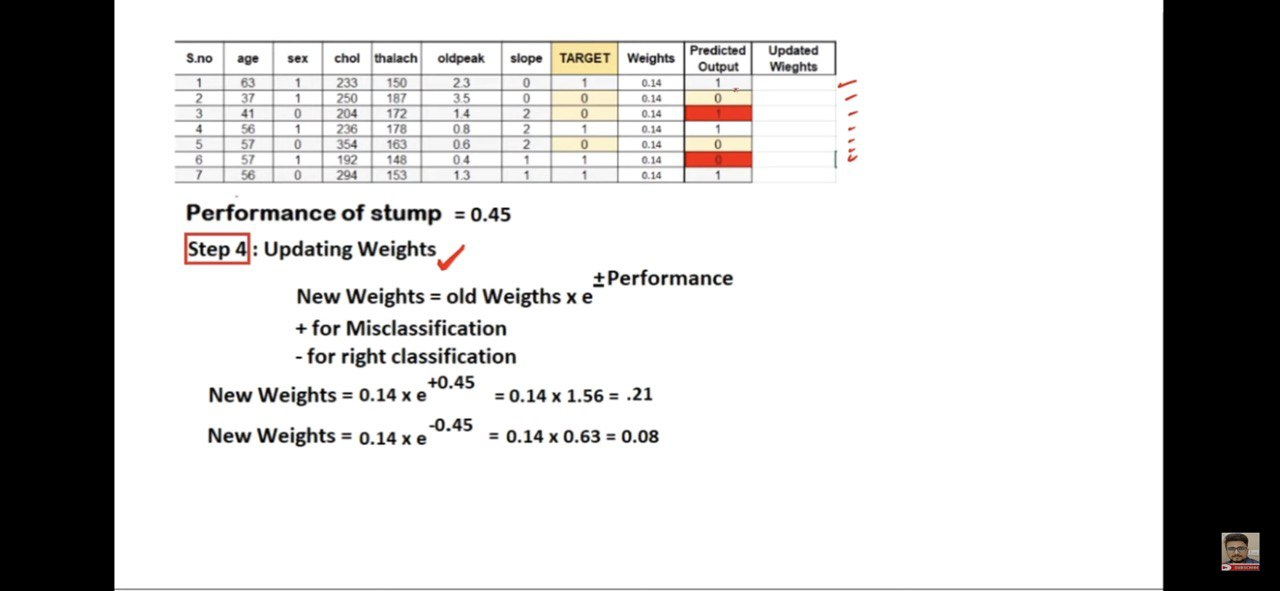

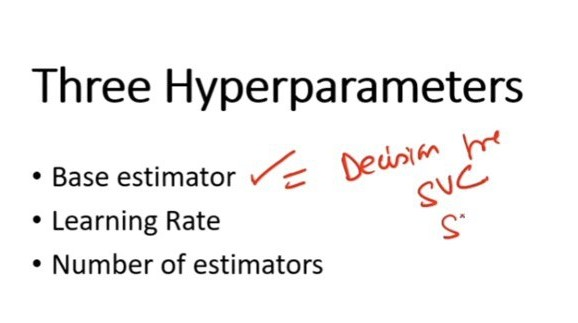

# Python implementation

In [1]:
# Imporitng the libraries 
import pandas as pd
import numpy as np
from sklearn import metrics 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



import warnings
warnings.filterwarnings('ignore')


In [3]:
#initializing the data fram
data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/boston_house_rent.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# About Dataset

CRIM: Per capita crime rate by town



ZN: Proportion of residential land zoned for lots over 25,000 sq. ft



INDUS: Proportion of non-retail business acres per town



CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)



NOX: Nitric oxide concentration (parts per 10 million)



RM: Average number of rooms per dwelling




AGE: Proportion of owner-occupied units built prior to 1940




DIS: Weighted distances to five Boston employment centers





RAD: Index of accessibility to radial highways




TAX: Full-value property tax rate per $10,000




PTRATIO: Pupil-teacher ratio by town




B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town




LSTAT: Percentage of lower status of the population




MEDV: Median value of owner-occupied homes in $1000s





# Each record in the database describes a Booston Subrub or town .

In [4]:
#Any missing values 
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [5]:
#Datset analysis/stats using describes method
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
#Finding out the correlation between the feature 

corr=data.corr()
corr.shape

(14, 14)

In [7]:
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


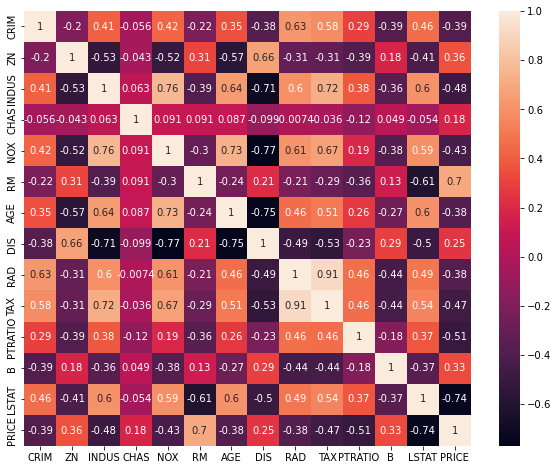

In [8]:
#plotting the heatmap of correlation between features
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)
plt.show()

#  Seems RAD and TAX are correlated . Lets check with scatter plot.



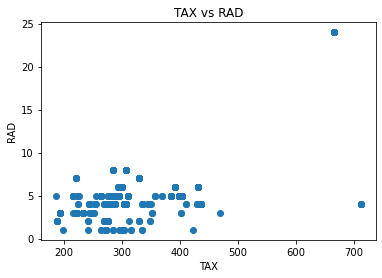

In [9]:
plt.scatter(data.TAX,data.RAD)
plt.xlabel('TAX')
plt.ylabel('RAD')
plt.title('TAX vs RAD')
plt.show()

Since we cannot confirm with plot that . There is a close relation . so we will not take risk and not deleting any fature.

In [12]:
#Dividing Feature and label
x=data.drop(columns=['PRICE'],axis=1)
y=data.PRICE

In [13]:
#Train Test Split (Hold Out Method)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=94062)


In [15]:
#AdaBoost model training
from sklearn.ensemble import AdaBoostRegressor

ada=AdaBoostRegressor()

ada.fit(x_train,y_train)

AdaBoostRegressor()

In [16]:
#Model prediction on train data
y_pred=ada.predict(x_train)

In [17]:
accuracy=metrics.r2_score(y_train,y_pred)
print("R Square Score ",accuracy)

R Square Score  0.9117953181861869


Since model has already seen the data . so it is producing better score

In [18]:
#Predicting test data with the model
y_test_pred=ada.predict(x_test)

In [19]:
#Model Evaluation
accuracy=metrics.r2_score(y_test,y_test_pred)
print('R Square Score ',accuracy)

R Square Score  0.7923716528236328


# #Hyperparameter Tuning Using RandomizedSearchCV

In [31]:
from sklearn.model_selection import RandomizedSearchCV


param={'n_estimators':[47,50,60,70],
      'learning_rate':[.25,.30,.40]}

In [32]:
rnd_search=RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions=param)

In [33]:
rnd_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [47, 50, 60, 70]})

In [34]:
rnd_search.best_estimator_

AdaBoostRegressor(learning_rate=0.25)

In [37]:
ada=AdaBoostRegressor(learning_rate=0.25,n_estimators=70)
ada.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.25, n_estimators=70)

In [38]:
y_pred=ada.predict(x_test)
print('*** Accuracy Post Tuning***')
print(metrics.r2_score(y_test,y_pred))

*** Accuracy Post Tuning***
0.8152327732535094


In [ ]:
#Student of DataScience
#Student of DataTrained - Saurav
#Date- 20-09-2022
#Time- 10:42